In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from datetime import datetime

# I. Import des données retraitées

In [2]:
df = pd.read_csv("projet 5/Online_Retail_Cleaned.csv")

In [3]:
cluster_of_interest = [0,2,4,5]

# II. Prédiction par réseau de neuronnes

In [4]:
X = df.iloc[[True if x in cluster_of_interest else False for x in df['interest_cluster']], 1:-1].values

In [5]:
y = df.iloc[[True if x in cluster_of_interest else False for x in df['interest_cluster']], -1:].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [7]:
mlp = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(X.shape[1] + 1), random_state=1, learning_rate='constant')
clf = GridSearchCV(mlp, {'alpha':np.linspace(0.1,1,10)}, cv=5)

In [8]:
clf.fit(X_train, y_train.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=12, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Text(0,0.5,'Mean Score')

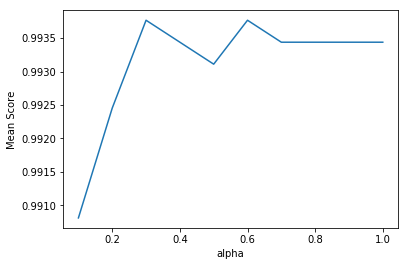

In [9]:
plt.plot(np.linspace(0.1,1,10), clf.cv_results_['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Mean Score')

In [10]:
mlp = MLPClassifier(solver='lbfgs', alpha=0.9, activation='logistic', random_state=1, learning_rate='constant')
clf = GridSearchCV(mlp, {'hidden_layer_sizes':np.linspace((X.shape[1] + 1)-10,(X.shape[1] + 1)+30,41).astype(int)}, cv=5)
clf.fit(X_train, y_train.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='logistic', alpha=0.9, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'hidden_layer_sizes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Text(0,0.5,'Mean Score')

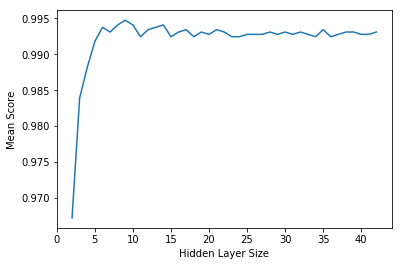

In [11]:
plt.plot(np.linspace((X.shape[1] + 1)-10,(X.shape[1] + 1)+30,41).astype(int), clf.cv_results_['mean_test_score'])
plt.xlabel('Hidden Layer Size')
plt.ylabel('Mean Score')

In [12]:
mlp = MLPClassifier(solver='lbfgs', alpha=0.9, hidden_layer_sizes=5, random_state=1, learning_rate='constant')
clf = GridSearchCV(mlp, {'activation':['identity', 'logistic', 'tanh', 'relu']}, cv=5)
clf.fit(X_train, y_train.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.9, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=5, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Text(0,0.5,'Mean Score')

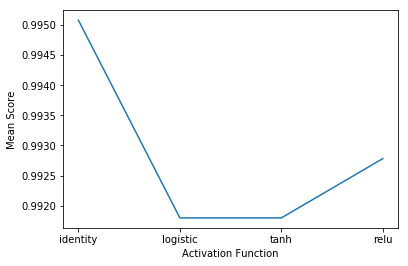

In [13]:
plt.plot(['identity', 'logistic', 'tanh', 'relu'], clf.cv_results_['mean_test_score'])
plt.xlabel('Activation Function')
plt.ylabel('Mean Score')

In [14]:
mlp = MLPClassifier(solver='lbfgs', random_state=1, learning_rate='constant')
clf = GridSearchCV(mlp, {'activation':['identity', 'logistic', 'tanh', 'relu'], 
                         'alpha':np.linspace(0.1,1,10), 
                         'hidden_layer_sizes':np.linspace(10,20,11).astype(int)}, cv=5)
clf.fit(X_train, y_train.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'], 'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'hidden_layer_sizes': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
results = pd.DataFrame(clf.cv_results_)

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args

In [16]:
list(results.loc[results['rank_test_score'] == 1].params)

[{'activation': 'identity', 'alpha': 0.1, 'hidden_layer_sizes': 14}]

In [17]:
clf = MLPClassifier(alpha=0.1, solver='lbfgs', activation='identity', hidden_layer_sizes=14, random_state=1, learning_rate='constant')
clf.fit(X_train, y_train.ravel())
y_pred = clf.predict(X_test)

In [18]:
confusion_matrix(y_test, y_pred)

array([[601,   1,   0,   0],
       [  2, 419,   0,   0],
       [  2,   2, 257,   0],
       [  1,   0,   0,  22]])

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       602
           2       0.99      1.00      0.99       421
           4       1.00      0.98      0.99       261
           5       1.00      0.96      0.98        23

   micro avg       0.99      0.99      0.99      1307
   macro avg       1.00      0.98      0.99      1307
weighted avg       0.99      0.99      0.99      1307



In [20]:
accuracy_score(y_pred,y_test)

0.9938791124713083

## Test de la robustesse de l'entraînement

In [21]:
from random import randint
def train_test_split_v2(X, y, test_size):
    categories = list(set(y.ravel()))
    nb_cat = len(categories)
    train_index = []
    category_train_size = (1 - test_size) * np.min([list(y.ravel()).count(x) for x in categories])
    
    cat_sample_size = {}
    for cat in categories:
        cat_sample_size[cat] = 0
        
    while len(train_index) < nb_cat * category_train_size:
        i = randint(0, len(y.ravel()) - 1)
        
        while i in train_index or cat_sample_size[y.ravel()[i]] >= category_train_size:
            i = randint(0, len(y.ravel()) - 1)
            
        train_index.append(i)
        cat_sample_size[y.ravel()[i]] += 1
    
    test_index = list(set(pd.DataFrame(y.ravel()).index.values) - set(train_index))
    return [X[train_index], X[test_index], y.ravel()[train_index], y.ravel()[test_index]]

In [22]:
X_train, X_test, y_train, y_test = train_test_split_v2(X, y, test_size=0.3)

In [23]:
clf.fit(X_train, y_train)

MLPClassifier(activation='identity', alpha=0.9, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=16, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [24]:
y_pred = clf.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1851
           2       0.94      0.97      0.95      1305
           4       0.99      0.96      0.97       859
           5       0.52      1.00      0.69        34

   micro avg       0.96      0.96      0.96      4049
   macro avg       0.86      0.97      0.89      4049
weighted avg       0.96      0.96      0.96      4049



In [26]:
accuracy_score(y_pred,y_test)

0.9592491973326748

## Test de la robustesse de la prédiction

In [27]:
# Original data
df_original = pd.read_excel("projet 5/Online Retail.xlsx")
df_original = df_original[~df_original['CustomerID'].isna()]
df_original = df_original.reset_index()
df_original['TotalPrice'] = df_original['Quantity'] * df_original['UnitPrice']
df_original['TotalPrice2'] = df_original['Quantity'] * df_original['UnitPrice']
# One hot encoding
encoder = CountVectorizer()
df_encoded = encoder.fit_transform(df_original['Description'])
freq = sum(df_encoded.toarray())
n_occurences = 500
df_encoded = pd.DataFrame(df_encoded.toarray()[:, freq>n_occurences])
df_encoded.columns = np.asarray(encoder.get_feature_names())[freq>500]
to_delete = ['10', '11', '12', '20', '24', '36', '3d', '50', '60', '72', 'am', 'and', 'black', 'blue', 'deluxe', 'for', 'giant', 'green', 'grey', 'grow', 'happy', 'hot', 'in', 'it', 'making', 'medium', 'memo', 'mini', 'mint', 'multi', 'new', 'night', 'no', 'of', 'of4', 'on', 'one', 'or', 'orange', 'over', 'pink', 'please', 'red',  'rose', 'size', 'small', 'so', 'soft', 'sweet', 'tall', 'the', 'tidy', 'tier', 'tonic', 'top', 'traditional', 'triple', 'union', 'up', 'welcome', 'white', 'word', 'world', 'yellow', 'you', 'your']
df_encoded = df_encoded.drop(columns=to_delete)
df_original = pd.concat([df_original, df_encoded], axis=1, join='inner')
# RFM
NOW = datetime(2019,1,1)
df_reduced = df_original.loc[:, ['CustomerID', 'InvoiceNo', 'InvoiceDate']].drop_duplicates() \
                                                            .sort_values(['CustomerID', 'InvoiceDate'])
penality = 1000
cond = df_reduced.CustomerID != df_reduced.CustomerID.shift(1)
df_reduced['DaysFromLastOrder'] = (df_reduced.InvoiceDate - df_reduced.InvoiceDate.shift(1))
df_reduced['DaysFromLastOrder'] = df_reduced['DaysFromLastOrder'].apply(lambda x: x.days)
df_reduced.loc[cond, 'DaysFromLastOrder'] = penality
df_original = pd.merge(df_original, df_reduced.loc[:, ['CustomerID', 'InvoiceNo', 'DaysFromLastOrder']], on=['CustomerID', 'InvoiceNo'])
rfmTable = df_original.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days, 
                                         'InvoiceNo': lambda x: len(x.drop_duplicates()),
                                         'TotalPrice': lambda x: x.sum(), 
                                         'TotalPrice2': lambda x: x.mean(), 
                                         'DaysFromLastOrder': lambda x: x[x > 0].mean()})
rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
rfmTable.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'TotalPrice': 'monetary_value',
                         'TotalPrice2': 'average_value',
                         'DaysFromLastOrder': 'average_days_between_orders'}, inplace=True)
df_ohe = pd.concat([df_original['CustomerID'], df_original.iloc[:, 11:-1]], axis=1, join='inner')
rfmTable = pd.merge(rfmTable, df_ohe.groupby('CustomerID').agg(np.sum), on='CustomerID')
rfmTable = rfmTable[rfmTable['monetary_value'] != 0]
# PCA
pca = PCA(n_components=6)
pca.fit(rfmTable.iloc[:,6:].values)
reduced_matrix = pca.transform(rfmTable.iloc[:,6:].values)
rfmTable = rfmTable.reset_index()
df_reduced = pd.concat([rfmTable.iloc[:,0:6], pd.DataFrame(reduced_matrix)], axis=1, join='inner')
# Scaler
df_reduced['average_days_between_orders'] = df_reduced['average_days_between_orders'].apply(lambda x: penality if np.isnan(x) else x)
scaler = StandardScaler()
df_reduced_norm = pd.DataFrame(scaler.fit_transform(df_reduced.iloc[:, 1:]))
df_reduced_norm.columns = df_reduced.columns[1:]

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [28]:
# fit classifier from original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
clf = MLPClassifier(solver='lbfgs', activation='identity', alpha=0.1, hidden_layer_sizes=14, random_state=1, learning_rate='constant')
clf.fit(X_train, y_train.ravel())

MLPClassifier(activation='identity', alpha=0.9, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=16, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [29]:
# check customer by customer how much data we need to have an accurate prediction
try_to_prev = {}
for CustomerID, Orders in df_original.groupby('CustomerID'):
    df_tmp = Orders.groupby('InvoiceDate').agg(np.sum)
    df_tmp_2 = Orders.groupby('InvoiceDate').agg(np.mean)
    df_tmp = df_tmp.drop(columns=['index'])
    df_tmp['InvoiceDate'] = df_tmp.index
    df_tmp['InvoiceNo'] = df_tmp.index
    df_tmp['TotalPrice2'] = df_tmp_2['TotalPrice2']
    df_tmp['DaysFromLastOrder'] = df_tmp_2['DaysFromLastOrder']
    i = 0
    nb_obs = np.max(df_tmp.count())
    
    try_to_prev[CustomerID] = -1
    y_pred = [-1]
    right_prev = df.loc[df['CustomerID'] == CustomerID, 'interest_cluster'].head(1).values
    
    if (nb_obs <= 1) or (len(right_prev) == 0) or (right_prev not in cluster_of_interest):
        continue
    
    while (y_pred[0] != right_prev[0]) & (i < nb_obs):
        i = i + 1
        tmp = pd.DataFrame(df_tmp.head(i).agg({'InvoiceDate': lambda x: (NOW - x.max()).days, 
                                         'InvoiceNo': lambda x: len(x.drop_duplicates()),
                                         'TotalPrice': lambda x: x.sum(), 
                                         'TotalPrice2': lambda x: x.mean(), 
                                         'DaysFromLastOrder': lambda x: x[x > 0].mean()})).T
        tmp['InvoiceDate'] = tmp['InvoiceDate'].astype(int)
        tmp.rename(columns={'InvoiceDate': 'recency', 
                                 'InvoiceNo': 'frequency', 
                                 'TotalPrice': 'monetary_value',
                                 'TotalPrice2': 'average_value',
                                 'DaysFromLastOrder': 'average_days_between_orders'}, inplace=True)
        tmp2 = pd.DataFrame(df_tmp.head(i).iloc[:, 5:-3].agg(np.sum)).T
        pca = PCA(n_components=6)
        pca.fit(rfmTable.iloc[:,6:].values)
        tmp2 = pd.DataFrame(pca.transform(tmp2.values))
        tmp = pd.merge(tmp, tmp2, left_index=True, right_index=True)
        tmp = pd.DataFrame(scaler.transform(tmp))
        y_pred = clf.predict(tmp.values)
    
    if (y_pred[0] != right_prev[0]) & (i == nb_obs):
        try_to_prev[CustomerID] = -2
    else:
        try_to_prev[CustomerID] = i

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

In [30]:
results = pd.DataFrame.from_dict(try_to_prev, orient='index')

Text(0,0.5,'Nombre de client bien classé')

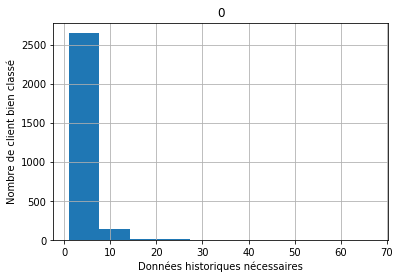

In [31]:
results[results[0] > -1].hist()
plt.xlabel('Données historiques nécessaires')
plt.ylabel('Nombre de client bien classé')
#histogramme par classe

In [32]:
results2 = results
results2['CustomerID'] = results.index
results2 = pd.merge(results2, df.loc[:,['CustomerID', 'interest_cluster']], how='inner', on='CustomerID')

In [33]:
results2[results2[0] > -1].groupby(['interest_cluster']).agg(np.mean)

0    CustomerID
interest_cluster                         
0                  4.052164  15274.857381
2                  1.438127  15221.051839
4                  1.005952  15343.071429
5                 18.954128  15499.376147

In [ ]:
results2[results2[0] > -1].mean()

# III. Prédiction par arbres

Il est nécessaire de remettre les classes numérotées de 0 à 2 pour que l'algo les détecte correctement

In [34]:
def rebase(i):
    if i == cluster_of_interest[0]:
        return 0
    elif i == cluster_of_interest[1]:
        return 1
    elif i == cluster_of_interest[2]:
        return 2
    elif i == cluster_of_interest[3]:
        return 3

In [35]:
y = df.iloc[[True if x in cluster_of_interest else False for x in df['interest_cluster']], -1:]

In [36]:
f = lambda row: rebase(row[0])
y = y.apply(f, axis=1).values

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [77]:
d_train = lgb.Dataset(X_train, label=y_train.ravel(), feature_name=list(df.iloc[:, 1:-1].columns))
params = {}
#params['learning_rate'] = 0.003
#params['boosting_type'] = 'gbdt'
params['objective'] = 'multiclass'
params['num_class'] = len(cluster_of_interest)
params['metric'] = 'multi_logloss'
#params['sub_feature'] = 0.5
params['num_trees'] = 100
params['num_leaves'] = 30
#params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [78]:
y_pred = clf.predict(X_test)

On sélectionne la catégorie avec la plus grande probabilité

In [79]:
def select_max(m):
    if m[0] == max(m):
        return 0
    if m[1] == max(m):
        return 1
    if m[2] == max(m):
        return 2
    if m[3] == max(m):
        return 3

In [80]:
f = lambda row: select_max(row[:])
y_pred2 = pd.DataFrame(y_pred).apply(f, axis=1)

In [81]:
confusion_matrix(y_test, y_pred2)

array([[577,   6,   3,   1],
       [  6, 417,   4,   0],
       [  5,   2, 249,   0],
       [  7,   0,   0,  30]])

In [82]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       587
           1       0.98      0.98      0.98       427
           2       0.97      0.97      0.97       256
           3       0.97      0.81      0.88        37

   micro avg       0.97      0.97      0.97      1307
   macro avg       0.97      0.94      0.95      1307
weighted avg       0.97      0.97      0.97      1307



In [83]:
accuracy_score(y_pred2,y_test)

0.9739862280030605

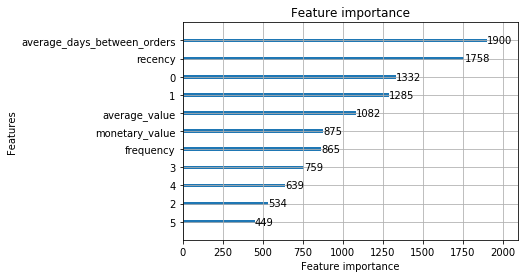

In [84]:
lgb.plot_importance(clf)

## Test de la robustesse d'entraînement

In [46]:
X_train, X_test, y_train, y_test = train_test_split_v2(X, y, test_size=0.3)

In [47]:
y_pred = clf.predict(X_test)

In [48]:
f = lambda row: select_max(row[:])
y_pred2 = pd.DataFrame(y_pred).apply(f, axis=1)

In [49]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1851
           1       0.97      0.97      0.97      1305
           2       0.99      0.98      0.98       859
           3       0.83      0.59      0.69        34

   micro avg       0.97      0.97      0.97      4049
   macro avg       0.94      0.88      0.90      4049
weighted avg       0.97      0.97      0.97      4049



In [50]:
accuracy_score(y_pred2,y_test)

0.9718448999753025

## Test de la robustesse de la prédiction

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
d_train = lgb.Dataset(X_train, label=y_train.ravel())
params = {}
#params['learning_rate'] = 0.003
#params['boosting_type'] = 'gbdt'
params['objective'] = 'multiclass'
params['num_class'] = len(cluster_of_interest)
params['metric'] = 'multi_logloss'
#params['sub_feature'] = 0.5
#params['num_leaves'] = 10
#params['min_data'] = 50
#params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)
#grid search

In [52]:
# check customer by customer how much data we need to have an accurate prediction
try_to_prev = {}
for CustomerID, Orders in df_original.groupby('CustomerID'):
    df_tmp = Orders.groupby('InvoiceDate').agg(np.sum)
    df_tmp_2 = Orders.groupby('InvoiceDate').agg(np.mean)
    df_tmp = df_tmp.drop(columns=['index'])
    df_tmp['InvoiceDate'] = df_tmp.index
    df_tmp['InvoiceNo'] = df_tmp.index
    df_tmp['TotalPrice2'] = df_tmp_2['TotalPrice2']
    df_tmp['DaysFromLastOrder'] = df_tmp_2['DaysFromLastOrder']
    i = 0
    nb_obs = np.max(df_tmp.count())
    
    try_to_prev[CustomerID] = -1
    y_pred2 = [-1]
    right_prev = df.loc[df['CustomerID'] == CustomerID, 'interest_cluster'].head(1).values
    
    if (nb_obs <= 1) or (len(right_prev) == 0) or (right_prev not in cluster_of_interest):
        continue
    
    right_prev = [rebase(right_prev)]
    while (y_pred2[0] != right_prev[0]) & (i < nb_obs):
        i = i + 1
        tmp = pd.DataFrame(df_tmp.head(i).agg({'InvoiceDate': lambda x: (NOW - x.max()).days, 
                                         'InvoiceNo': lambda x: len(x.drop_duplicates()),
                                         'TotalPrice': lambda x: x.sum(), 
                                         'TotalPrice2': lambda x: x.mean(), 
                                         'DaysFromLastOrder': lambda x: x[x > 0].mean()})).T
        tmp['InvoiceDate'] = tmp['InvoiceDate'].astype(int)
        tmp.rename(columns={'InvoiceDate': 'recency', 
                                 'InvoiceNo': 'frequency', 
                                 'TotalPrice': 'monetary_value',
                                 'TotalPrice2': 'average_value',
                                 'DaysFromLastOrder': 'average_days_between_orders'}, inplace=True)
        tmp2 = pd.DataFrame(df_tmp.head(i).iloc[:, 5:-3].agg(np.sum)).T
        pca = PCA(n_components=6)
        pca.fit(rfmTable.iloc[:,6:].values)
        tmp2 = pd.DataFrame(pca.transform(tmp2.values))
        tmp = pd.merge(tmp, tmp2, left_index=True, right_index=True)
        tmp = pd.DataFrame(scaler.transform(tmp))
        y_pred = clf.predict(tmp.values)
        f = lambda row: select_max(row[:])
        y_pred2 = pd.DataFrame(y_pred).apply(f, axis=1)
    
    if (y_pred2[0] != right_prev[0]) & (i == nb_obs):
        try_to_prev[CustomerID] = -2
    else:
        try_to_prev[CustomerID] = i

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standa

In [53]:
results = pd.DataFrame.from_dict(try_to_prev, orient='index')

Text(0,0.5,'Nombre de client bien classé')

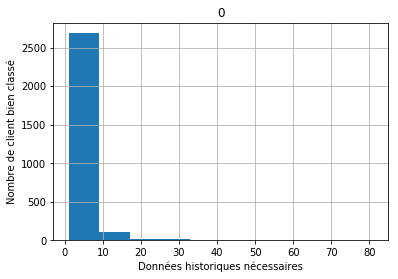

In [54]:
results[results[0] > -1].hist()
plt.xlabel('Données historiques nécessaires')
plt.ylabel('Nombre de client bien classé')

In [55]:
results2 = results
results2['CustomerID'] = results.index
results2 = pd.merge(results2, df.loc[:,['CustomerID', 'interest_cluster']], how='inner', on='CustomerID')

In [56]:
results2[results2[0] > -1].groupby(['interest_cluster']).agg(np.mean)

0    CustomerID
interest_cluster                         
0                  4.102165  15280.949473
2                  1.441275  15223.724832
4                  1.000000  15343.071429
5                 18.122642  15512.509434

In [85]:
results2[results2[0] > -1].mean()

0                       3.699894
CustomerID          15284.934132
interest_cluster        1.079958
dtype: float64

In [86]:
results2[results2[0] > -1].groupby(['interest_cluster']).count()

0  CustomerID
interest_cluster                  
0                 1801        1801
2                  596         596
4                  336         336
5                  106         106